In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Exemplo: km de um carro (x) -> preço (y)
df = pd.DataFrame ({
        'Quilometragem': [1000.0, 3000.0, 5000.0, 10000.0, 15000.0, 20000.0, 30000.0, 50000.0, 70000.0],
        'Preco': [100000.0, 98000.0, 93000.0, 85000.0, 75000.0, 59000.0, 52000.0, 48000.0, 46000.0]
    }
)

# normalizando
df['Quilometragem'] = df['Quilometragem']/1000
df['Preco'] = df['Preco']/1000

theta0 = 0
theta1 = 0
alfa = 0.0001

m = df.shape[0]

historico_mse = list()

iteracoes = 50000

# Passo iterativo: modificar os coeficientes para minimizar a função de erro
for i in range(iteracoes):
    # y^ = ax + b
    y_pred = theta1 * df['Quilometragem'] + theta0

    # calculando erro
    erros = y_pred - df['Preco']

    # atualizando os coeficientes c/ derivadas parciais
    theta0_gradiente = (2/m) * sum(erros)
    theta1_gradiente = (2/m) * sum(erros * df['Quilometragem'])
    theta0 = theta0 - alfa * theta0_gradiente
    theta1 = theta1 - alfa * theta1_gradiente

    # calculando custo MSE (erro quadrático médio) e armazenando p/ análise
    historico_mse.append(np.mean(erros**2))

In [13]:
# Resultados
print(f'Coeficiente theta0: {theta0:.2f}')
print(f'Coeficiente theta1: {theta1:.2f}')
print(f'Erro Quadrático Médio (MSE): {historico_mse[iteracoes-1]:.2f}')

Coeficiente theta0: 90.98
Coeficiente theta1: -0.81
Erro Quadrático Médio (MSE): 94.43


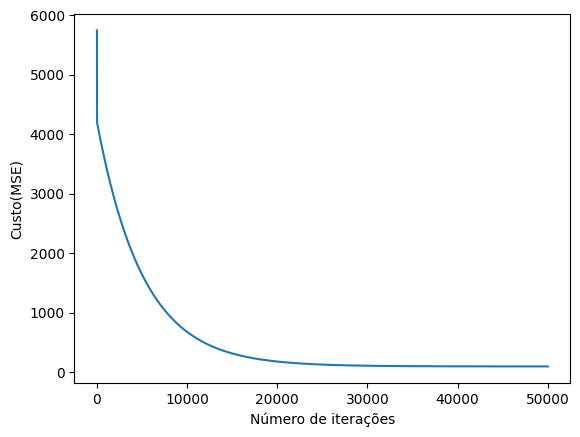

In [14]:
# Visualizar a evolução do custo
plt.plot(range(iteracoes), historico_mse)
plt.xlabel('Número de iterações')
plt.ylabel('Custo(MSE)')
plt.show()

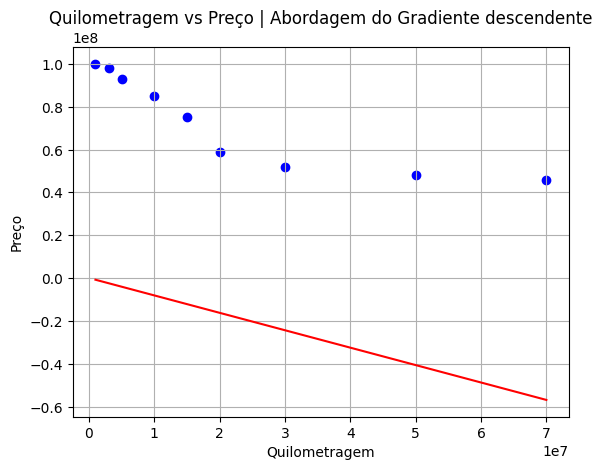

In [16]:
# Mostrando a linha da Regressão Linear ajustada com o Gradiente Descendente
df['Quilometragem'] = df['Quilometragem']*1000
df['Preco'] = df['Preco']*1000

linha_de_regressao = [theta0 * 1000 + (theta1 * x) for x in df['Quilometragem']]

plt.scatter(df.Quilometragem, df.Preco, color='b')
plt.plot(df.Quilometragem, linha_de_regressao, color='r')
plt.title('Quilometragem vs Preço | Abordagem do Gradiente descendente')
plt.xlabel('Quilometragem')
plt.ylabel('Preço')
plt.grid()
plt.show()